# Baseball-ML-Project

Baseball case study

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success.There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts,Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, and Errors



-- Output: Number of predicted wins (W)



-- General Approach: For predicting the number of wins a baseball team will attain -- based on the given input features, a linear regression approach is neccessary. 



In [1]:
## import essential libraries :
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## load the baseball dataset :
data=pd.read_csv('baseball.csv')

In [3]:
## lets check the first five records of the given dataset :
data.head()

,Wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,ERA,Complete Game,Shutouts,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [4]:
## lets check the last five records of the given dataset :
data.tail()

,Wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,ERA,Complete Game,Shutouts,Saves,Errors
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


In [5]:
## shape of the dataset (rows, columns) :
data.shape

(30, 17)

In [6]:
## information of the dataset :
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Wins           30 non-null     int64  
 1   Runs           30 non-null     int64  
 2   At Bats        30 non-null     int64  
 3   Hits           30 non-null     int64  
 4   Doubles        30 non-null     int64  
 5   Triples        30 non-null     int64  
 6   Homeruns       30 non-null     int64  
 7   Walks          30 non-null     int64  
 8   Strikeouts     30 non-null     int64  
 9   Stolen Bases   30 non-null     int64  
 10  Runs Allowed   30 non-null     int64  
 11  Earned Runs    30 non-null     int64  
 12  ERA            30 non-null     float64
 13  Complete Game  30 non-null     int64  
 14  Shutouts       30 non-null     int64  
 15  Saves          30 non-null     int64  
 16  Errors         30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [7]:
## check column names :
data.columns

Index(['Wins', 'Runs', 'At Bats', 'Hits', 'Doubles', 'Triples', 'Homeruns',
       'Walks', 'Strikeouts', 'Stolen Bases', 'Runs Allowed', 'Earned Runs',
       'ERA', 'Complete Game', 'Shutouts', 'Saves', 'Errors'],
      dtype='object')

In [8]:
## lets check is their any null values present in the given dataset :
data.isnull().sum()

Wins             0
Runs             0
At Bats          0
Hits             0
Doubles          0
Triples          0
Homeruns         0
Walks            0
Strikeouts       0
Stolen Bases     0
Runs Allowed     0
Earned Runs      0
ERA              0
Complete Game    0
Shutouts         0
Saves            0
Errors           0
dtype: int64

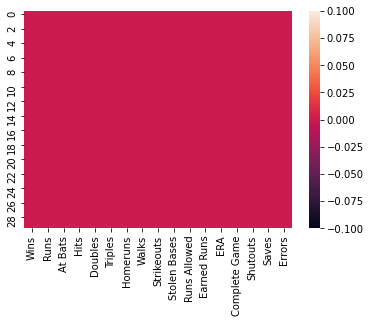

In [9]:
## check the null values by using seaborn heatmap function (visulization technique) :
sns.heatmap(data.isnull())
plt.show()

In [10]:
## Stastictical analysis :
data.describe()

,Wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,ERA,Complete Game,Shutouts,Saves,Errors
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


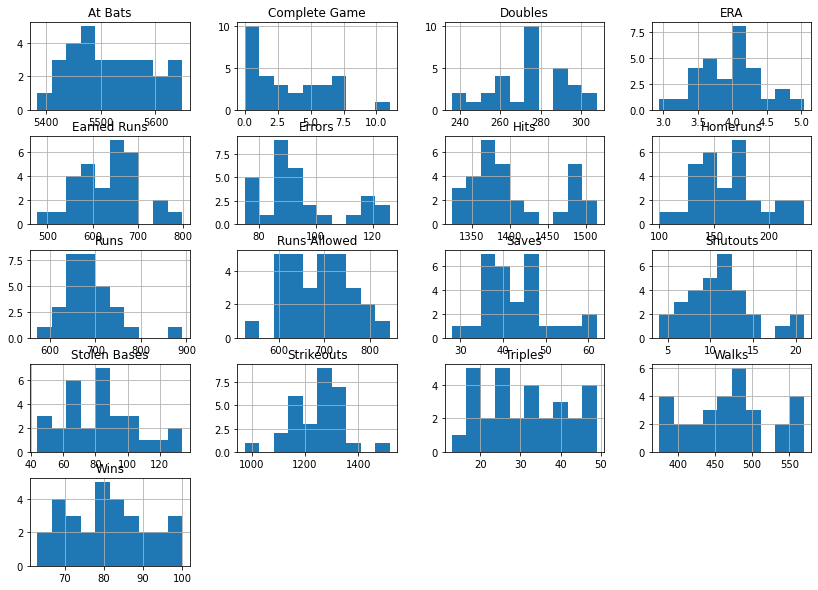

In [11]:
## lets check the frequency of the given features by histogram :
data.hist(figsize=(14,10))
plt.show()

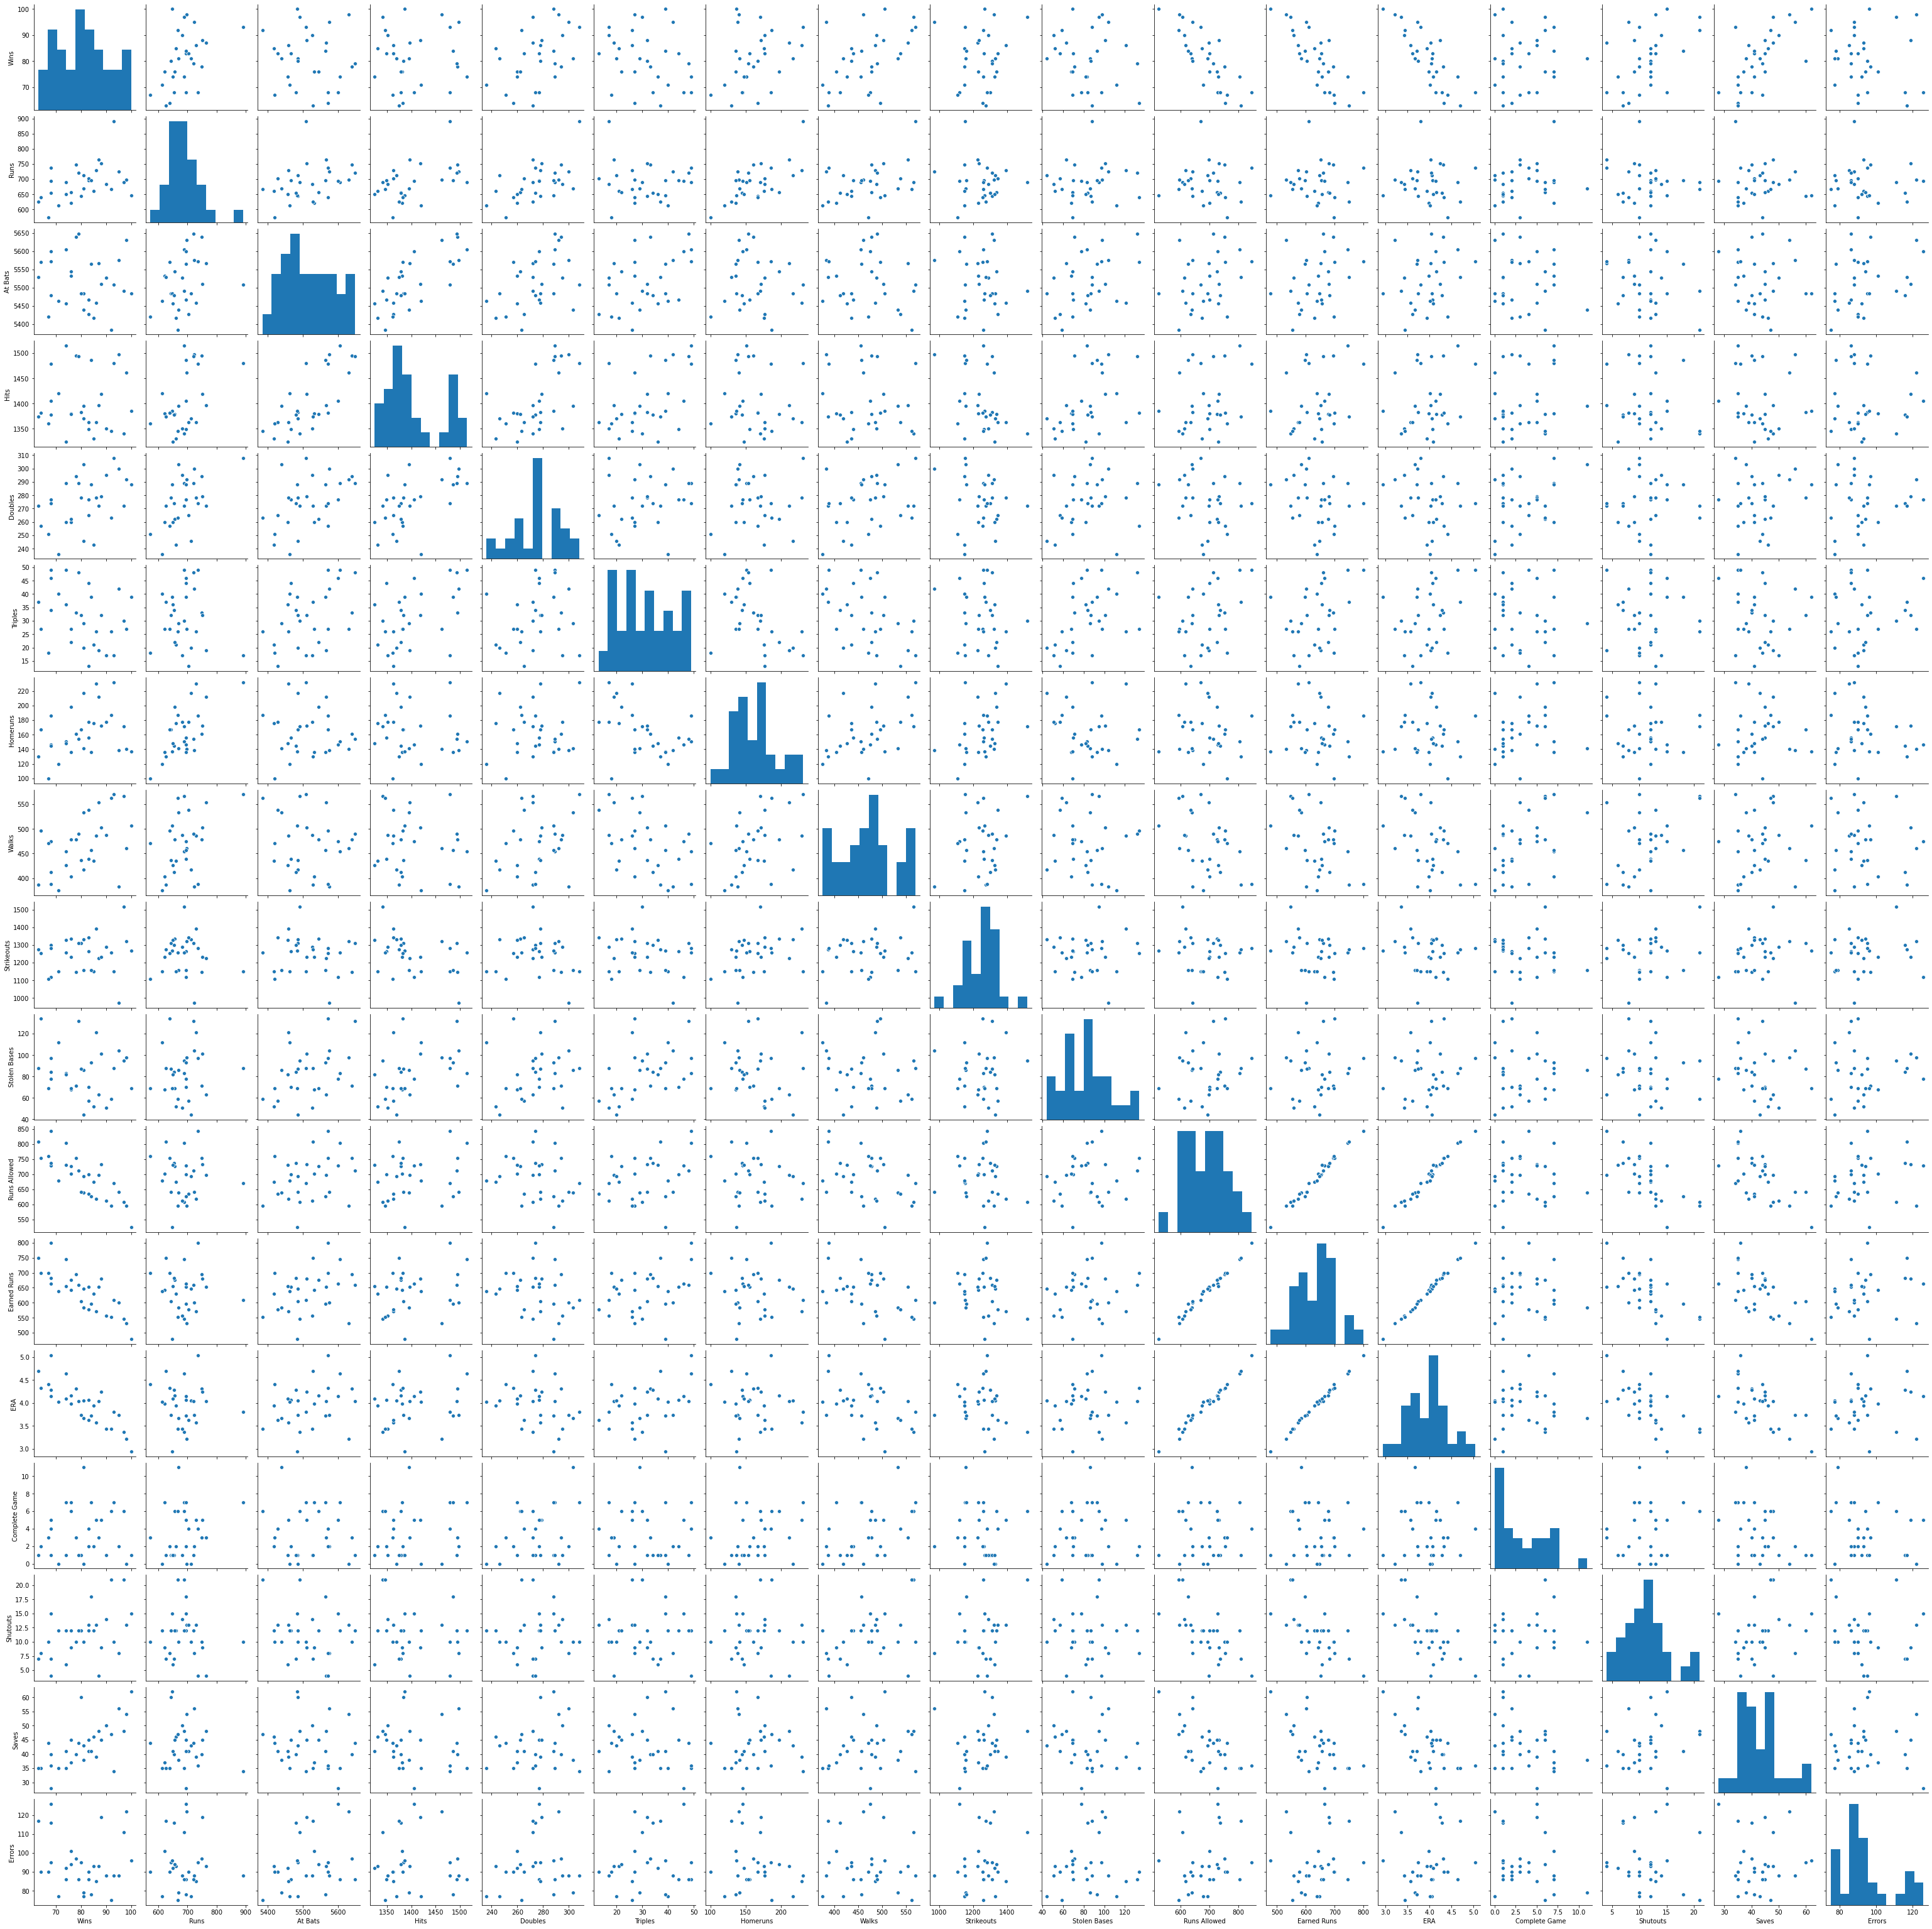

In [12]:
sns.pairplot(data)

In [13]:
## check the skewness in the given dataset :
data.skew()

Wins             0.047089
Runs             1.200786
At Bats          0.183437
Hits             0.670254
Doubles         -0.230650
Triples          0.129502
Homeruns         0.516441
Walks            0.158498
Strikeouts      -0.156065
Stolen Bases     0.479893
Runs Allowed     0.045734
Earned Runs      0.058710
ERA              0.053331
Complete Game    0.736845
Shutouts         0.565790
Saves            0.657524
Errors           0.890132
dtype: float64

In [14]:
## we use for loop for removing the skewnwss :
for i in data.columns:
    if data.skew().loc[i]>0.55:
        data[i]=np.log1p(data[i])

In [15]:
## lets check once again skewness :
data.skew()

Wins             0.047089
Runs             0.744813
At Bats          0.183437
Hits             0.628584
Doubles         -0.230650
Triples          0.129502
Homeruns         0.516441
Walks            0.158498
Strikeouts      -0.156065
Stolen Bases     0.479893
Runs Allowed     0.045734
Earned Runs      0.058710
ERA              0.053331
Complete Game   -0.325962
Shutouts        -0.589640
Saves            0.163057
Errors           0.632916
dtype: float64

In [16]:
for i in data.columns:
    if data.skew().loc[i]>0.55:
        data[i]=np.log1p(data[i])

In [17]:
data.skew()

Wins             0.047089
Runs             0.686947
At Bats          0.183437
Hits             0.623445
Doubles         -0.230650
Triples          0.129502
Homeruns         0.516441
Walks            0.158498
Strikeouts      -0.156065
Stolen Bases     0.479893
Runs Allowed     0.045734
Earned Runs      0.058710
ERA              0.053331
Complete Game   -0.325962
Shutouts        -0.589640
Saves            0.163057
Errors           0.584066
dtype: float64

In [18]:
for i in data.columns:
    if data.skew().loc[i]>0.55:
        data[i]=np.log1p(data[i])

In [19]:
data.skew()

Wins             0.047089
Runs             0.667934
At Bats          0.183437
Hits             0.621789
Doubles         -0.230650
Triples          0.129502
Homeruns         0.516441
Walks            0.158498
Strikeouts      -0.156065
Stolen Bases     0.479893
Runs Allowed     0.045734
Earned Runs      0.058710
ERA              0.053331
Complete Game   -0.325962
Shutouts        -0.589640
Saves            0.163057
Errors           0.565896
dtype: float64

In [20]:
## check the outliers from the dataset :
from scipy.stats import zscore
z_score=abs(zscore(data))
print(data.shape)
data_final=data.loc[(z_score<3).all(axis=1)]
print(data_final.shape)

(30, 17)
(29, 17)


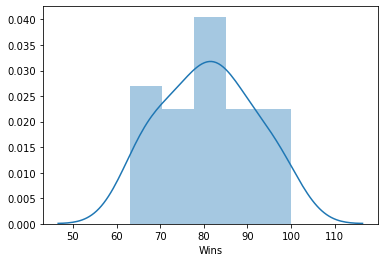

In [21]:
## Univariate analysis :
sns.distplot(data['Wins'])

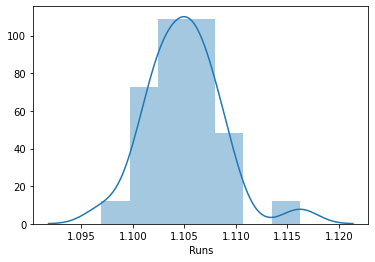

In [22]:
## Univariate analysis :
sns.distplot(data['Runs'])

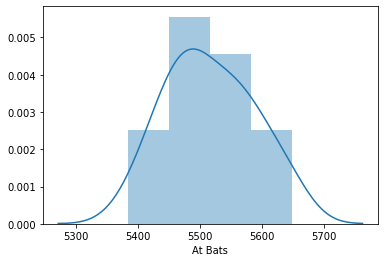

In [23]:
sns.distplot(data['At Bats'])

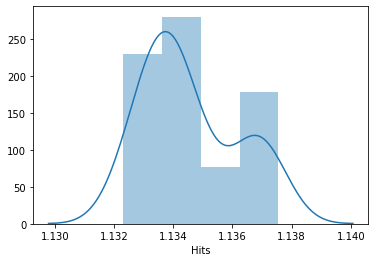

In [24]:
sns.distplot(data['Hits'])

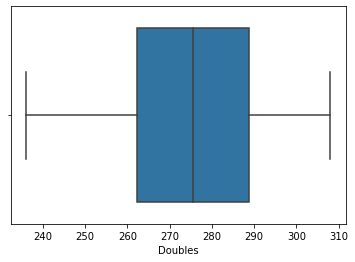

In [25]:
sns.boxplot(data['Doubles'])

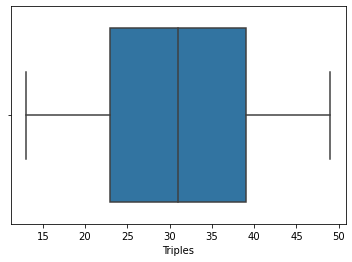

In [26]:
sns.boxplot(data['Triples'])

In [27]:
dfr=data.corr()
dfr

,Wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,ERA,Complete Game,Shutouts,Saves,Errors
Wins,1.000000,0.444722,-0.087947,0.034926,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.047176,0.436247,0.668097,-0.090411
Runs,0.444722,1.000000,0.341075,0.481185,0.567657,-0.040803,0.677008,0.394492,-0.026346,0.080946,-0.053708,-0.050960,-0.060774,0.256449,-0.120227,-0.072443,-0.014105
At Bats,-0.087947,0.341075,1.000000,0.740241,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.059218,-0.189223,-0.133599,0.323733
Hits,0.034926,0.481185,0.740241,1.000000,0.566120,0.476230,-0.091393,-0.117781,-0.400403,0.416041,0.223247,0.251812,0.230541,0.113628,-0.126313,-0.152751,-0.032370
Doubles,0.427797,0.567657,0.453370,0.566120,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.282895,0.073459,0.144282,0.111109
Triples,-0.251118,-0.040803,0.435422,0.476230,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.058674,-0.064669,-0.184189,0.112568
Homeruns,0.307407,0.677008,-0.066983,-0.091393,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.200279,-0.068809,-0.005146,-0.195801
Walks,0.484342,0.394492,-0.136414,-0.117781,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.484686,0.362907,0.110550,-0.075596
Strikeouts,0.111850,-0.026346,-0.106022,-0.400403,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.104017,0.173573,0.155716,0.165451
Stolen Bases,-0.157234,0.080946,0.372618,0.416041,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.033010,-0.092023,-0.196962,0.073753


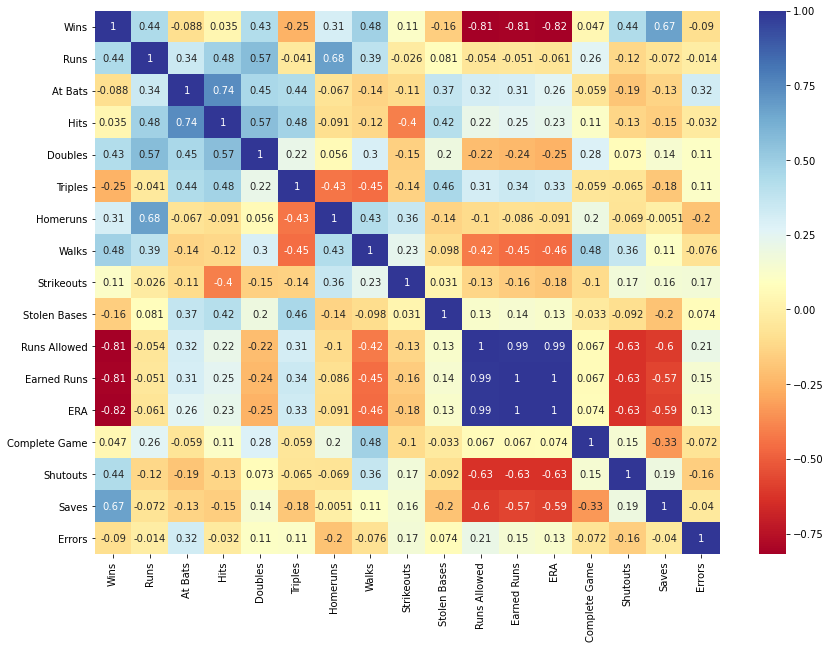

In [28]:
plt.figure(figsize=(14,10))
sns.heatmap(dfr,annot=True,cmap='RdYlBu')
plt.show()

In [29]:
## splitting the data into input and output(X and y) :
X=data_final.drop('Wins',axis=1)
y=data_final['Wins']

In [30]:
X.shape

(29, 16)

In [31]:
y.shape

(29,)

In [32]:
## Scaling the dataset :
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(X)
x=pd.DataFrame(x,columns=X.columns)

In [33]:
x.shape

(29, 16)

In [34]:
x.head()

,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,ERA,Complete Game,Shutouts,Saves,Errors
0,0.951123,0.830084,1.721335,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.511148,-0.511388,-0.240415,-0.722413,1.554812,-0.425590
1,0.360950,-0.702831,-0.951607,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,0.232161,0.238952,-0.240415,0.312085,0.296229,-0.592334
2,-0.235176,-1.100253,-0.085799,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,-0.754153,-0.643801,1.815711,-0.157879,-0.672787,-1.216047
3,-1.343608,0.233951,-0.345758,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,0.089217,0.040333,1.214333,-0.426009,-0.825263,0.555158
4,0.209042,1.255894,2.025415,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.561540,1.496876,1.214333,0.312085,-1.142637,-0.592334


In [35]:
## importing the scikit learn library train_test_split :
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [36]:
## lets check the shape of the data (Xtest, Xtrain, ytrain, ytest) :
print('shape of X_train:',X_train.shape)
print('shape of X_test:',X_test.shape)
print('shape of y_train:',y_train.shape)
print('shape of y_test:',y_test.shape)

shape of X_train: (23, 16)
shape of X_test: (6, 16)
shape of y_train: (23,)
shape of y_test: (6,)


# LinearRegression

In [37]:
## model selection :
from sklearn import linear_model ## importing required libraries from skit-learn :
from sklearn.model_selection import cross_val_score
cross_val_score(linear_model.LinearRegression(),X,y,cv=10,scoring='r2').mean()

-3.1025045025651954

In [38]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)
pred

array([76.95354051, 82.88325699, 79.04801133, 58.92905083, 79.0109658 ,
       79.36520394])

In [39]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 6.305834315166824
MSE: 59.66969721941421
RMSE: 7.724616315352771


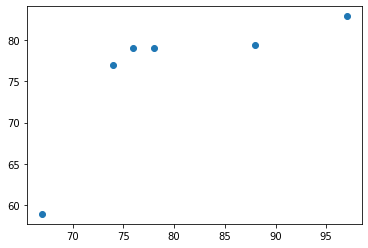

In [40]:
plt.scatter(x=y_test,y=pred)

# DecisionTreeRegressor

In [41]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
pred=dtr.predict(X_test)

Text(0, 0.5, 'Predicted-Y')

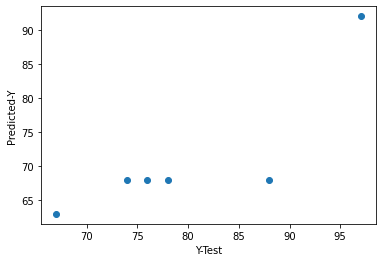

In [42]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y-Test')
plt.ylabel('Predicted-Y')

In [43]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 8.833333333333334
MSE: 106.83333333333333
RMSE: 10.336021155809101


# RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(X_train,y_train)
pred=rdr.predict(X_test)

In [44]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 8.833333333333334
MSE: 106.83333333333333
RMSE: 10.336021155809101


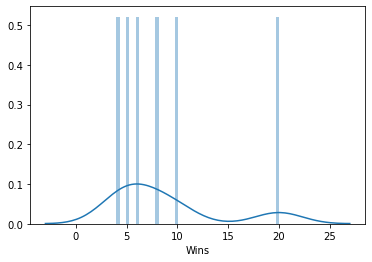

In [45]:
sns.distplot((y_test-pred),bins=50)

,Y Test,Pred
28,74,68.0
17,97,92.0
13,76,68.0
23,67,63.0
9,78,68.0


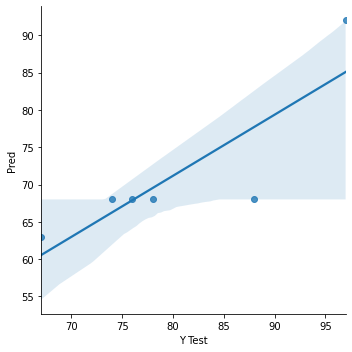

In [46]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

In [47]:
import joblib
joblib.dump(lr,'Baseball.pkl')

['Baseball.pkl']